In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

import bql
bq = bql.Service()

In [71]:
universe = ['USDCNH Curncy',
            'KWN+1M Curncy',
            'USDSGD Curncy',
            'IHN+1M Curncy',
            'IRN+1M Curncy',
            'MRN+1M Curncy',
            'PPN+1M Curncy',
            'USDTHB Curncy',
            'USDJPY Curncy',
            'ESZ5 Index',
            'NQZ5 Index',
            'TY1 Comdty',
            'VIX Index',
            'XAUUSD Curncy',
            'CL1 Comdty',
            'DXY Index',
           'USDJPY Curncy']

date_range = bq.func.range('-3Y', '0d')
# Define target data including a BQL function to refine the default return
data_item = {'Price': bq.data.px_last(dates=date_range).dropna()}

request  = bql.Request(universe, data_item)
response = bq.execute(request)

df = response[0].df().reset_index()
pivot = df.pivot(columns='ID', values='Price', index='DATE').sort_index()
pivot.head()

ID,CL1 Comdty,DXY Index,ESZ5 Index,IHN+1M Curncy,IRN+1M Curncy,KWN+1M Curncy,MRN+1M Curncy,NQZ5 Index,PPN+1M Curncy,TY1 Comdty,USDCNH Curncy,USDJPY Curncy,USDSGD Curncy,USDTHB Curncy,VIX Index,XAUUSD Curncy
DATE,,,,,,,,,,,,,,,,
2022-11-07,91.79,110.120,4178.0,15683.0,82.09,1392.65,4.7384,12290.0,58.50,109.6406,7.2298,146.63,1.4008,37.423,24.35,1675.63
2022-11-08,88.91,109.636,4248.0,15655.0,81.66,1374.74,4.7236,12390.0,58.16,110.2813,7.2302,145.68,1.3987,37.305,25.54,1712.42
2022-11-09,85.83,110.549,4167.0,15676.0,81.64,1371.15,4.6925,12125.0,58.10,110.3281,7.2741,146.47,1.4028,36.835,26.09,1706.74
2022-11-10,86.47,108.206,4331.0,15524.0,80.72,1349.72,4.6508,12931.0,57.28,112.5156,7.1521,140.98,1.3824,36.880,23.53,1755.45
2022-11-11,88.96,106.292,4369.0,15470.0,80.61,1313.95,4.6105,13153.0,57.25,112.3125,7.0920,138.81,1.3718,35.948,22.52,1771.24


In [72]:
pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 939 entries, 2022-11-07 to 2025-11-07
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CL1 Comdty     756 non-null    float64
 1   DXY Index      779 non-null    float64
 2   ESZ5 Index     756 non-null    float64
 3   IHN+1M Curncy  785 non-null    float64
 4   IRN+1M Curncy  787 non-null    float64
 5   KWN+1M Curncy  787 non-null    float64
 6   MRN+1M Curncy  795 non-null    float64
 7   NQZ5 Index     756 non-null    float64
 8   PPN+1M Curncy  788 non-null    float64
 9   TY1 Comdty     756 non-null    float64
 10  USDCNH Curncy  931 non-null    float64
 11  USDJPY Curncy  939 non-null    float64
 12  USDSGD Curncy  937 non-null    float64
 13  USDTHB Curncy  732 non-null    float64
 14  VIX Index      775 non-null    float64
 15  XAUUSD Curncy  776 non-null    float64
dtypes: float64(16)
memory usage: 124.7 KB


In [73]:
# reindex to master timeline by day and drop weekends
 
master_index = pd.date_range(start=pivot.index.min(), end=pivot.index.max(), freq='b')
df = pivot.reindex(master_index)
df.iloc[:16]

ID,CL1 Comdty,DXY Index,ESZ5 Index,IHN+1M Curncy,IRN+1M Curncy,KWN+1M Curncy,MRN+1M Curncy,NQZ5 Index,PPN+1M Curncy,TY1 Comdty,USDCNH Curncy,USDJPY Curncy,USDSGD Curncy,USDTHB Curncy,VIX Index,XAUUSD Curncy
2022-11-07,91.79,110.120,4178.0,15683.0,82.09,1392.65,4.7384,12290.0,58.50,109.6406,7.2298,146.63,1.4008,37.423,24.35,1675.63
2022-11-08,88.91,109.636,4248.0,15655.0,81.66,1374.74,4.7236,12390.0,58.16,110.2813,7.2302,145.68,1.3987,37.305,25.54,1712.42
2022-11-09,85.83,110.549,4167.0,15676.0,81.64,1371.15,4.6925,12125.0,58.10,110.3281,7.2741,146.47,1.4028,36.835,26.09,1706.74
2022-11-10,86.47,108.206,4331.0,15524.0,80.72,1349.72,4.6508,12931.0,57.28,112.5156,7.1521,140.98,1.3824,36.880,23.53,1755.45
2022-11-11,88.96,106.292,4369.0,15470.0,80.61,1313.95,4.6105,13153.0,57.25,112.3125,7.0920,138.81,1.3718,35.948,22.52,1771.24
2022-11-14,85.87,106.660,4335.0,15556.0,81.14,1323.82,4.5798,13040.0,57.21,112.1250,7.0417,139.89,1.3720,35.908,23.73,1771.40
2022-11-15,86.92,106.404,4369.0,15557.0,81.26,1316.37,4.5319,13180.0,57.28,112.5625,7.0484,139.28,1.3707,35.590,24.54,1778.94
2022-11-16,85.59,106.281,4337.0,15653.0,81.69,1336.93,4.5383,13019.0,57.44,113.2031,7.1078,139.50,1.3702,35.690,24.11,1773.87
2022-11-17,81.64,106.694,4324.0,15746.0,81.72,1342.57,4.5548,12990.0,57.49,112.6250,7.1478,140.20,1.3745,35.885,23.93,1760.44
2022-11-18,80.08,106.930,4344.0,15655.0,81.69,1339.59,4.5385,12988.0,57.24,112.2969,7.1264,140.37,1.3759,35.757,23.12,1750.68


In [74]:
df = df.ffill()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 785 entries, 2022-11-07 to 2025-11-07
Freq: B
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CL1 Comdty     785 non-null    float64
 1   DXY Index      785 non-null    float64
 2   ESZ5 Index     785 non-null    float64
 3   IHN+1M Curncy  785 non-null    float64
 4   IRN+1M Curncy  785 non-null    float64
 5   KWN+1M Curncy  785 non-null    float64
 6   MRN+1M Curncy  785 non-null    float64
 7   NQZ5 Index     785 non-null    float64
 8   PPN+1M Curncy  785 non-null    float64
 9   TY1 Comdty     785 non-null    float64
 10  USDCNH Curncy  785 non-null    float64
 11  USDJPY Curncy  785 non-null    float64
 12  USDSGD Curncy  785 non-null    float64
 13  USDTHB Curncy  785 non-null    float64
 14  VIX Index      785 non-null    float64
 15  XAUUSD Curncy  785 non-null    float64
dtypes: float64(16)
memory usage: 104.3 KB


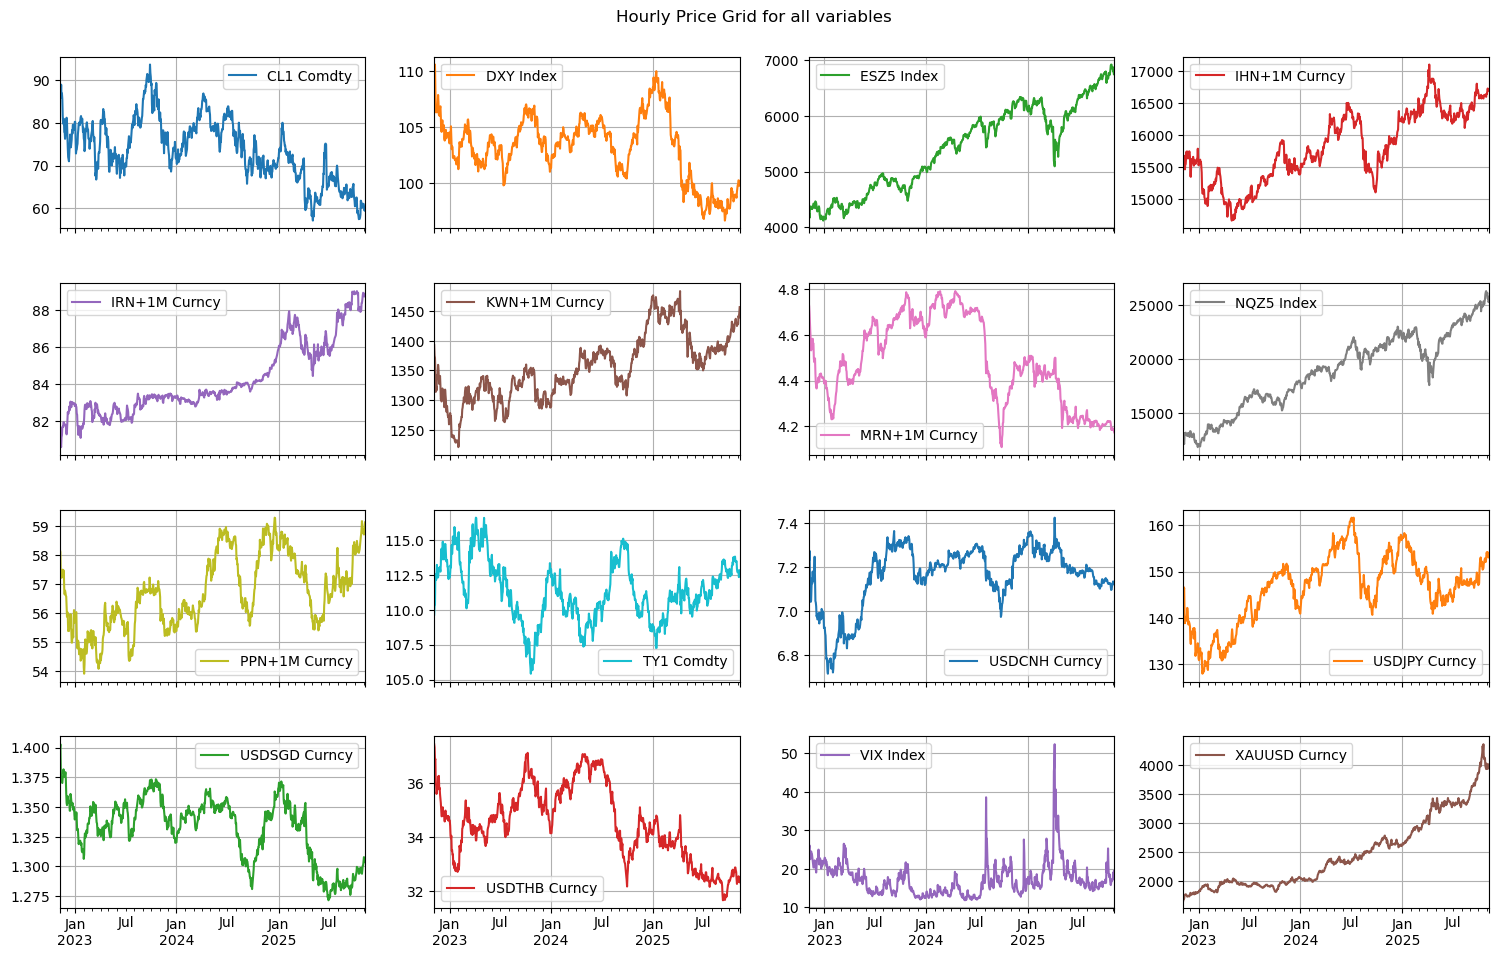

In [75]:
df.plot(subplots = True, layout = (5,4), figsize = (15,12), title = 'Hourly Price Grid for all variables', grid = True, sharex = True)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


In [76]:
# compure hourly log returns

log_returns = np.log(df / df.shift(1))
log_returns = log_returns.dropna()
log_returns.describe()

ID,CL1 Comdty,DXY Index,ESZ5 Index,IHN+1M Curncy,IRN+1M Curncy,KWN+1M Curncy,MRN+1M Curncy,NQZ5 Index,PPN+1M Curncy,TY1 Comdty,USDCNH Curncy,USDJPY Curncy,USDSGD Curncy,USDTHB Curncy,VIX Index,XAUUSD Curncy
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,-0.000539,-0.000125,0.000615,0.000081,0.000101,0.000057,-0.000162,0.000923,0.000013,0.000035,-0.000019,0.000058,-0.000092,-0.000186,-0.000283,0.001113
std,0.019837,0.004347,0.009498,0.004146,0.002119,0.005897,0.003808,0.012367,0.003584,0.004074,0.002985,0.006720,0.002999,0.005209,0.073552,0.009870
min,-0.089575,-0.021422,-0.061305,-0.021563,-0.011333,-0.027004,-0.020048,-0.062405,-0.014607,-0.013198,-0.016914,-0.038569,-0.014649,-0.025596,-0.442449,-0.054504
25%,-0.012628,-0.002551,-0.003381,-0.002208,-0.000835,-0.003307,-0.001793,-0.004981,-0.001892,-0.002402,-0.001322,-0.003575,-0.001728,-0.003068,-0.038203,-0.004261
50%,0.000000,0.000019,0.000486,0.000184,0.000119,0.000461,0.000000,0.001042,0.000000,0.000000,0.000146,0.000472,0.000000,0.000000,-0.004628,0.001081
75%,0.012218,0.002596,0.005521,0.002437,0.000966,0.003607,0.001800,0.007646,0.002140,0.002402,0.001519,0.003870,0.001668,0.002793,0.031589,0.006971
max,0.070090,0.015971,0.089829,0.016884,0.013205,0.018695,0.014205,0.111991,0.011894,0.019727,0.014247,0.021033,0.013977,0.021613,0.554110,0.035683


# PCA

In [77]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

macro_rets = log_returns[['ESZ5 Index', 'NQZ5 Index',
            'TY1 Comdty',
            'VIX Index',
            'XAUUSD Curncy',
            'CL1 Comdty',
            'DXY Index', 'USDJPY Curncy']]


# scaling data 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(macro_rets.dropna())
pca = PCA(n_components=4).fit(scaled_data)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", pca.explained_variance_ratio_.sum())

Explained variance ratio: [0.33990442 0.30616484 0.13326705 0.07276258]
Cumulative explained variance: 0.8520988946166476


numbers below are not correlations - they are weights (coefficients) in the linear combination - positive/negative sign just tells me whether that variable moves with or against that factor

                    PC1       PC2       PC3       PC4
ID                                                   
ESZ5 Index     0.583124 -0.074324 -0.077660 -0.012000
NQZ5 Index     0.565458 -0.099860 -0.110322  0.011415
TY1 Comdty    -0.107806 -0.458464 -0.272077  0.101860
VIX Index     -0.530107  0.044667  0.128401  0.011461
XAUUSD Curncy  0.011869 -0.435321  0.374526  0.787685
CL1 Comdty     0.164852  0.046424  0.865765 -0.292017
DXY Index     -0.006669  0.548478 -0.037621  0.336899
USDJPY Curncy  0.142216  0.528992 -0.007147  0.412306


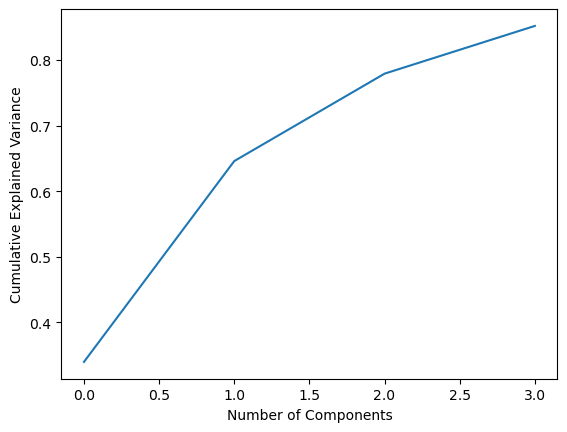

In [78]:
# check loadings contribution

loadings = pd.DataFrame(
    pca.components_.T,
    index=macro_rets.columns,
    columns=[f"PC{i+1}" for i in range(pca.n_components)]
)
print(loadings)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

# Regression

In [79]:
pca_factors = pd.DataFrame(pca.transform(scaled_data), 
                           index=macro_rets.dropna().index, # Use the index from the data fed into PCA
                           columns=[f"PC{i+1}" for i in range(pca.n_components)])

pca_factors.head()

,PC1,PC2,PC3,PC4
2022-11-08,0.443857,-2.845930,-1.040401,1.511346
2022-11-09,-2.611536,1.905769,-1.387592,1.155942
2022-11-10,4.780957,-9.956167,-0.767365,-1.474795
2022-11-11,1.546053,-3.754888,1.567961,-2.178407
2022-11-14,-1.422360,1.388968,-1.238158,1.148505


In [80]:
fx_returns = log_returns[['USDCNH Curncy',
            'KWN+1M Curncy',
            'USDSGD Curncy',
            'IHN+1M Curncy',
            'IRN+1M Curncy',
            'MRN+1M Curncy',
            'PPN+1M Curncy',
            'USDTHB Curncy']]
fx_returns.head()

ID,USDCNH Curncy,KWN+1M Curncy,USDSGD Curncy,IHN+1M Curncy,IRN+1M Curncy,MRN+1M Curncy,PPN+1M Curncy,USDTHB Curncy
2022-11-08,0.000055,-0.012944,-0.001500,-0.001787,-0.005252,-0.003128,-0.005829,-0.003158
2022-11-09,0.006053,-0.002615,0.002927,0.001341,-0.000245,-0.006606,-0.001032,-0.012679
2022-11-10,-0.016914,-0.015753,-0.014649,-0.009744,-0.011333,-0.008926,-0.014214,0.001221
2022-11-11,-0.008439,-0.026859,-0.007697,-0.003485,-0.001364,-0.008703,-0.000524,-0.025596
2022-11-14,-0.007118,0.007484,0.000146,0.005544,0.006553,-0.006681,-0.000699,-0.001113


In [81]:
# rolling window approach

window_pca = 90    # 3 month PCA window
window_reg = 60    # 60-day regression window
n_components = 4

pca_betas = []

for end_idx in range(window_pca + window_reg, len(macro_rets)):
    start_idx = end_idx - window_pca
    pca = PCA(n_components=n_components)
    scaled_data = scaler.fit_transform(macro_rets.iloc[start_idx:end_idx])
    pca.fit(scaled_data)
    
    pc_scores = pd.DataFrame(
        pca.transform(scaled_data),
        index=macro_rets.iloc[start_idx:end_idx].index,
        columns=[f'PC{i+1}' for i in range(n_components)]
    )
    
    # now regress FX on these PCs for the most recent 60 days
    fx_window = fx_returns.iloc[end_idx-window_reg:end_idx]
    
    for ccy in fx_window.columns:
        model = sm.OLS(fx_window[ccy], sm.add_constant(pc_scores.iloc[-window_reg:], )).fit(cov_type="HC3")
        pca_betas.append({
            'date': fx_window.index[-1],
            'ccy': ccy,
            **{f'PC{i+1}': model.params[i+1] for i in range(n_components)},
            'R2': model.rsquared
        })

In [82]:
pca_beta_df = pd.DataFrame(pca_betas)
pca_beta_df.iloc[-15:]

,date,ccy,PC1,PC2,PC3,PC4,R2
5057,2025-11-05,KWN+1M Curncy,-2.496713e-04,-0.001828,-0.000750,-0.000221,0.512698
5058,2025-11-05,USDSGD Curncy,-6.759385e-04,-0.001037,-0.000232,-0.000550,0.810549
5059,2025-11-05,IHN+1M Curncy,-1.054091e-04,-0.000963,-0.000382,-0.000242,0.283315
5060,2025-11-05,IRN+1M Curncy,-1.992741e-04,-0.000304,-0.000341,-0.000045,0.069650
5061,2025-11-05,MRN+1M Curncy,1.095140e-04,0.000065,0.000245,-0.000143,0.047316
5062,2025-11-05,PPN+1M Curncy,-6.837105e-04,-0.001235,-0.000502,-0.000625,0.348699
5063,2025-11-05,USDTHB Curncy,-2.530674e-07,-0.000579,-0.000111,-0.000125,0.068017
5064,2025-11-06,USDCNH Curncy,-1.264914e-04,-0.000419,0.000056,-0.000278,0.297620
5065,2025-11-06,KWN+1M Curncy,-1.069325e-04,-0.001816,-0.000744,-0.000185,0.500163
5066,2025-11-06,USDSGD Curncy,-6.734818e-04,-0.001025,-0.000213,-0.000614,0.814655


In [83]:
loadings = pd.DataFrame(pca.components_.T, index=macro_rets.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

In [84]:
scaler = StandardScaler().fit(macro_rets.dropna())
scaler

StandardScaler()

In [85]:
# --- Step 1: pick the latest snapshot per currency ---
latest_date = pca_beta_df['date'].max()
snapshot = (
    pca_beta_df[pca_beta_df['date'] == latest_date]
    .set_index('ccy')
    [['PC1','PC2','PC3','PC4','R2']]
)

# --- Step 2: align with loadings ---
pc_cols = [c for c in snapshot.columns if c.startswith('PC')]
W = loadings[pc_cols]   # rows = original variables, cols = PCs

# --- Step 3: map FX→PC betas to standardized original drivers ---
beta_stdX = snapshot[pc_cols].dot(W.T)

# --- Step 4: undo standardization (back to real-world units) ---
driver_scales = pd.Series(scaler.scale_, index=W.index)
fx_to_orig = beta_stdX.div(driver_scales, axis=1)

# --- Step 5: convert to bps per 1% driver move ---
fx_to_orig_bps_per_1pct = fx_to_orig * 100

# --- Step 6: add metadata and pretty print ---
fx_to_orig_bps_per_1pct['R2'] = snapshot['R2']
fx_to_orig_bps_per_1pct['Date'] = latest_date
fx_to_orig_bps_per_1pct = fx_to_orig_bps_per_1pct.sort_values('R2', ascending = False)
fx_to_orig_bps_per_1pct.round(5)

ID,ESZ5 Index,NQZ5 Index,TY1 Comdty,VIX Index,XAUUSD Curncy,CL1 Comdty,DXY Index,USDJPY Curncy,R2,Date
ccy,,,,,,,,,,
USDSGD Curncy,-2.37035,-1.23942,-18.82730,0.10287,-2.52806,-0.86918,18.08470,11.03981,0.81466,2025-11-06
KWN+1M Curncy,-8.44641,-6.09377,-14.08653,0.72051,-9.19970,-0.35403,21.38702,9.27188,0.50016,2025-11-06
PPN+1M Curncy,-3.87092,-2.50868,-17.46145,0.24524,-5.34653,-1.06907,18.94844,10.27630,0.31077,2025-11-06
USDCNH Curncy,-1.57880,-0.91796,-6.58174,0.14173,0.61214,-0.33961,6.26778,3.97306,0.29762,2025-11-06
IHN+1M Curncy,-4.32606,-3.04522,-9.34792,0.37566,-3.87681,-0.93144,11.91111,5.60140,0.27489,2025-11-06
IRN+1M Curncy,-0.76627,-0.61018,-3.61695,0.01604,-3.57637,-0.48081,4.65926,1.93000,0.06092,2025-11-06
USDTHB Curncy,-2.25485,-1.45699,-7.65485,0.20125,-0.66748,-0.98998,7.69556,4.31174,0.06024,2025-11-06
MRN+1M Curncy,-0.09347,0.08283,-0.80334,0.04385,2.85784,0.04267,-0.31315,0.56762,0.03959,2025-11-06


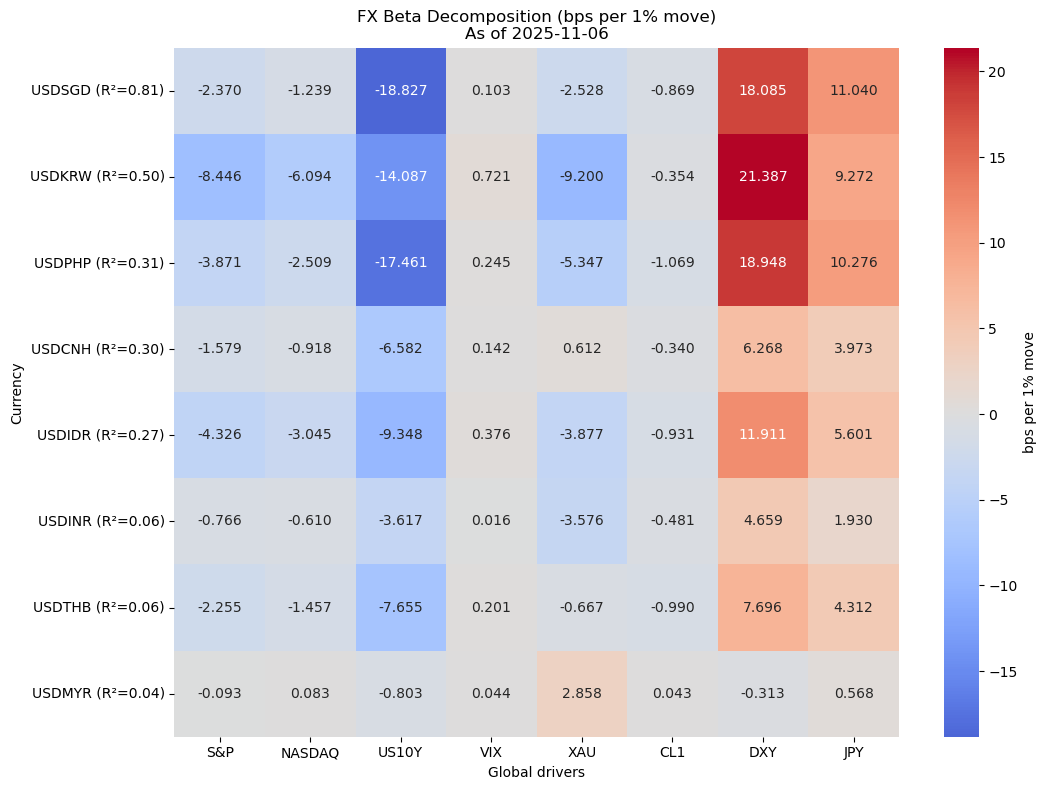

In [86]:
# rename columns
col_map = {
    'ESZ5 Index': 'S&P',
    'NQZ5 Index': 'NASDAQ',
    'TY1 Comdty': 'US10Y',
    'VIX Index': 'VIX',
    'XAUUSD Curncy': 'XAU',
    'CL1 Comdty': 'CL1',
    'DXY Index': 'DXY',
    'USDJPY Curncy': 'JPY'
}
df = fx_to_orig_bps_per_1pct.rename(columns=col_map)

# rename currency labels
row_map = {
    'USDSGD Curncy': 'USDSGD',
    'PPN+1M Curncy': 'USDPHP',
    'KWN+1M Curncy': 'USDKRW',
    'IRN+1M Curncy': 'USDINR',
    'IHN+1M Curncy': 'USDIDR',
    'USDTHB Curncy': 'USDTHB',
    'USDCNH Curncy': 'USDCNH',
    'MRN+1M Curncy': 'USDMYR'
}
df = df.rename(index=row_map)

y_labels = [
    f"{ccy} (R²={r2:.2f})"
    for ccy, r2 in zip(df.index, df['R2'])
]

# heatmap
heatmap_df = df.iloc[:, :8]
plt.figure(figsize=(11, 8))

ax = sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    center=0,
    cbar_kws={'label': 'bps per 1% move'}
)

ax.set_yticklabels(y_labels, rotation=0)  # ✅ replace row names with R² included
ax.set_xlabel("Global drivers")
ax.set_ylabel("Currency")

title_date = df['Date'].iloc[0]
ax.set_title(f"FX Beta Decomposition (bps per 1% move)\nAs of {title_date:%Y-%m-%d}")

plt.tight_layout()
plt.show()

- usdthb and xau (gold) correlation has decoupled recently, in fact gold's correlation to any of these currencies has dropped off a lot
- variance in USDSGD and USDPHP getting picked up more by moves in the rest of these other global drivers - USDCNH and USDTHB fall lower on the list as compared to previous iteration
- bulk of moves in EM Asia still very much driven by global USD
- 

In [88]:
df

ID,S&P,NASDAQ,US10Y,VIX,XAU,CL1,DXY,JPY,R2,Date
ccy,,,,,,,,,,
USDSGD,-2.370349,-1.239421,-18.827299,0.102875,-2.528060,-0.869180,18.084696,11.039805,0.814655,2025-11-06
USDKRW,-8.446412,-6.093773,-14.086529,0.720511,-9.199703,-0.354030,21.387019,9.271879,0.500163,2025-11-06
USDPHP,-3.870923,-2.508683,-17.461450,0.245244,-5.346531,-1.069067,18.948436,10.276297,0.310772,2025-11-06
USDCNH,-1.578803,-0.917956,-6.581742,0.141732,0.612135,-0.339610,6.267778,3.973064,0.297620,2025-11-06
USDIDR,-4.326065,-3.045220,-9.347921,0.375657,-3.876812,-0.931443,11.911113,5.601403,0.274886,2025-11-06
USDINR,-0.766274,-0.610183,-3.616946,0.016037,-3.576366,-0.480813,4.659259,1.929999,0.060920,2025-11-06
USDTHB,-2.254846,-1.456989,-7.654848,0.201249,-0.667476,-0.989981,7.695558,4.311745,0.060242,2025-11-06
USDMYR,-0.093468,0.082827,-0.803339,0.043854,2.857842,0.042673,-0.313148,0.567619,0.039587,2025-11-06
